# Optimization

<style>
.MathJax {
  font-family: "Common HTML";
}
</style>

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
\newcommand{\loss}{\ell}
\newcommand{\eloss}{\mc{L}}
\newcommand{\abs}[1]{| #1 |}
\newcommand{\norm}[1]{\| #1 \|}
\newcommand{\tp}{T}
$$

__<div style="text-align: right"> ASE3001: Computational Experiments for Aerospace Engineering, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_
_<div style="text-align: right"> Jiwoo Choi (jiwoochoi@inha.edu) </div>_


<br>

___

<br>

Mathematical optimization, also known simply as optimization or mathematical programming, is the process of selecting the best element, with regard to some criteria, from a set of available alternatives. Optimization problems arise in all quantitative disciplines, from computer science and engineering to operations research and economics, and the development of solution methods has been of interest to mathematicians for centuries.

Recently, due to advancements in artificial intelligence technology, optimization techniques have been receiving increased attention from a wider audience, because the learning processes of AI models are formulated and solved as optimization problems.

<br>

## Standard form optimization problem

In general, optimization problems are expressed in the following form.

$$
\begin{aligned}
  \underset{x}{\minimize} \quad & f_0(x)  \\
  \text{subject to} \quad & f_i(x) \le 0,  &i=1,\dots,m \\
   & h_i(x) = 0,  &
i=1,\dots,p
\end{aligned}
$$

- $x\in\R^n$: _optimization variable_, _decision variable_, or simply the _variable_
- $f_0(x): \R^n \rightarrow \R$:  _objective function_, or _cost function_
- $f_i(x): \R^n \rightarrow \R, \quad i=1,\dots,m$: _inequality constraint functions_
- $h_i(x): \R^n \rightarrow \R, \quad i=1,\dots,p$: _equality constraint functions_
- The problem is _feasible_ if there exists $x$ that satisfies the constraint functions

<br>

### Examples

_Data fitting_
- variables: model parameters
- constraints: prior information, parameter limits
- objective: measure of misfit or prediction error, plus regularization terms

_Missile guidance_
- variables: future control inputs
- constraints: actuator limits, stealthiness, target acquisition, and so on
- objective: miss distance

_Target tracking_
- variables: target position, velocity
- constraints: target dynamics, radar performance
- objective: likelihood of probabilistic model

_Portfolio optimization_
- variables: amounts invested in different assets
- constraints: budget, per-asset investment, minimum return
- objective: overall risk or return variance

_In-painting_
- variables: pixel values on corrupted pixels
- constraints: pixel values on uncorrupted pixels
- objective: overall naturalness of the image



<br>

___

<br>

## Least squares problem

<br>

Today we focus on one of the simplest optimization problems, the **least squares problem**. The problem itself is not just the simplest but also the most important and most widely used in a wide variety of engineering disciplines.

For example, given a set of $N$ data points $ (a_i, b_i)$, where $ i \in \{0, 1, \dots, N-1\} $ and $ a_i \in \R^k, b_i \in\R $, the variable $ x\in\R^{k+1} $ that best approximates the relations between $a_i$ and $b_i$ as a linear function of $x$, $ b_i \approx x_1 + a_i^Tx_{2:k+1}$, in terms of minimizing the residual is defined as,

$$
x^* = \arg \min \left( \|Ax - b\|^2 \right)
$$

where

$$
A =
\begin{bmatrix}
1 & {a}_0^T \\
1 & {a}_1^T \\
\vdots \\
1 & {a}_{N-1}^T
\end{bmatrix},
\quad
b =
\begin{bmatrix}
b_0 \\
b_1 \\
\vdots \\
b_{N-1}
\end{bmatrix}.
$$


The problem of finding the best variable $x$ is known as the least squares problem.

In this case, the optimal solution $x^* $ is obtained by finding the point where the gradient of the sum squares of the residual is zero:

$$\nabla_x  \|Ax - b\|^2  = 2A^T(Ax - b) = 0 $$

yielding the closed-form solution:

$$
x^* = \left( A^T A \right)^{-1} A^T b
$$

More theoretical details and a comprehensive understanding of the applications of least squares problems can be found on the webpage of [ASE2910: Applied linear algebra](https://jonghank.github.io/ase2910.html).

<br>

___

<br>

## Gradient descent method

On the other hand, iterative methods such as the gradient descent method can also be used to minimize the sum of the squares of the residuals.

Gradient descent is an algorithm that iteratively moves the estimate in the direction of the negative gradient to progressively approach the optimal value, thus finding the point where the loss function is minimized.


The pseudo code of the gradient descent algorithm for finding a (locally) optimal solution minimizing $f(x)$ is as follows,
$$
\begin{array}{l}
\textbf{initialize } x, \textbf{and set } \eta>0, \epsilon>0.\\
\textbf{for } i \leftarrow 1 \textbf{ to } N \textbf{ do} \\
\quad x \leftarrow x - \eta \nabla f(x); \\
\quad \textbf{if } \left\|f(x) \right\|^2 < \epsilon\ \textbf{then} \\
\quad \quad \text{break}\\
\textbf{end}
\end{array}
$$
where, $\eta$ is a learning rate, or step size, that determines how much the variables are updated at each iteration.

Note that this can be used for solving a general unconstrained optimization problems, not just the least squares problem, at least locally as long as the gradient information is available.

In [ ]:
import numpy as np
import numpy.linalg as lg

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.lines import Line2D

<br>

Consider a simple one-dimensional example where $a\in \R$, which tries to find a straight line that best approximates the data.


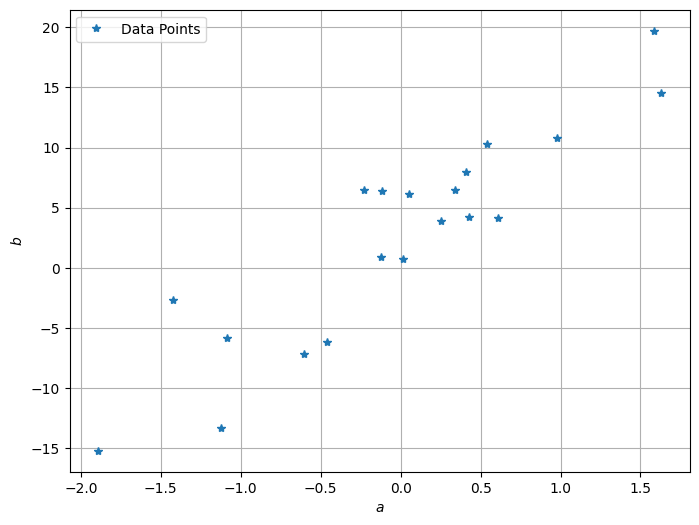

In [ ]:
np.random.seed(3001)

A = np.random.randn(20,2)
A[:,0] = 1

sort = np.argsort(A[:,1])

b = A[:,1] * 10 + 3
b += np.random.randn(*b.shape)* 3

plt.figure(figsize=(8,6), dpi=100)
plt.plot( A[:,1],b, '*', label='Data Points')
plt.grid()
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.legend()
plt.show()

<br>

Implementing the gradient descent method on the above problem, we obtain the following.

In [ ]:
x_init = np.random.randn(2)

lr = 1e-3
eps_crt = 1e-5

In [ ]:
def func_grad(x, A, b):
    grad = 2 * A.T @ (A@x - b)

    return grad

epochs = 3000

x = x_init

grads  = []
x_hist = []

for i in range(epochs):
    grad = func_grad(x, A, b)
    grads.append(grad)
    x_hist.append(x)
    if lg.norm(grad) <= eps_crt:
        break

    x_new = x - lr * grad

    x = x_new

x_gd = x

print(f"Optimal x via gradient descent method: {x_gd}")

Optimal x via gradient descent method: [2.70278419 8.82888948]


<br>

Note that the obtained solution is identical up to the numerical precision to the closed-form solution obtained from the `numpy.linalg.lstsq` function.

In [ ]:
x_opt = lg.lstsq(A, b, rcond=-1)[0]

diff = x_gd - x_opt

print(f"Optimal x via numpy.linalg.lstsq: {x_opt}")
print(f"Optimal x via gradient descent method: {x_gd}")
print(f"Norm of the difference: {lg.norm(diff)}")

Optimal x via numpy.linalg.lstsq: [2.7027842  8.82888978]
Optimal x via gradient descent method: [2.70278419 8.82888948]
Norm of the difference: 3.0658357462663093e-07


<br>

Using the least squares method, we get a pretty good approximation of the data lines.

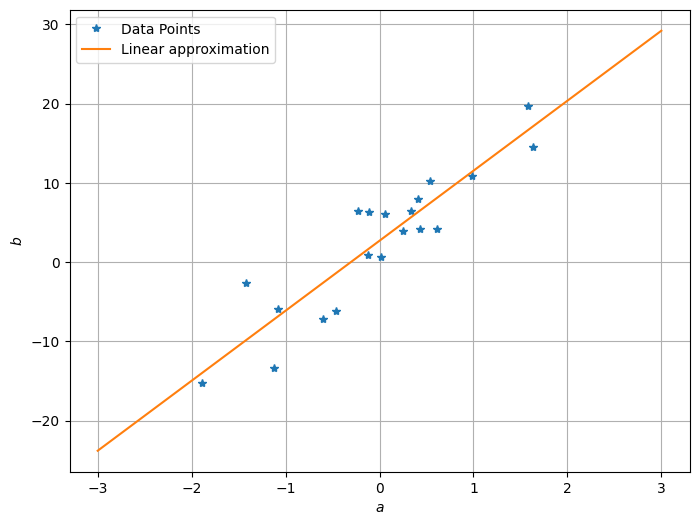

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot( A[:,1],b, '*', label='Data Points')

_in = np.linspace(-3,3)
line =  _in * x_opt[1] + x_opt[0]
plt.plot(_in,line, label='Linear approximation')
plt.grid()
plt.xlabel(r'$a$')
plt.ylabel(r'$b$')
plt.legend()
plt.show()

<br>

___

<br>


## Automatic differentiation via JAX

[JAX](https://jax.readthedocs.io/en/latest/index.html) is an open source library developed by Google that enables high-performance numerical computing and machine learning. Specifically, JAX provides automatic differentiation, which computes gradients by applying a chain rule to break down complex functions into simpler parts. For your information, the code and diagram is presented below for you to grab the simple idea of automatic differentiation.

<br>

<img src="https://jonghank.github.io/ase3001/files/autodiff.png" width="900">

<br>


<br>

The implementation of the gradient descent algorithm with `jax` is as follows.

In [ ]:
import os
os.environ["JAX_PLATFORM_NAME"] = "cpu"

import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

In [ ]:
def loss_func(x, A, b):
    res = A @ x - b
    loss = np.sum(res**2)

    return loss

grad_jax = jax.grad(loss_func)

x = x_init

grads  = []
x_hist = []

for i in range(1000):
    grad = grad_jax(x, A, b)
    grads.append(grad)
    x_hist.append(x)
    if lg.norm(grad) <= eps_crt:
        break

    x_new = x - lr * grad

    x = x_new

x_jax = x

diff = x_gd - x_opt

print(f"Optimal x via numpy.linalg.lstsq: {x_opt}")
print(f"Optimal x via gradient descent: {x_gd}")
print(f"Optimal x via automatic differentiation and JAX: {x_jax}")
print(f"Norm of the difference: {lg.norm(diff)}")

Optimal x via numpy.linalg.lstsq: [2.7027842  8.82888978]
Optimal x via gradient descent: [2.70278419 8.82888948]
Optimal x via automatic differentiation and JAX: [2.70278419 8.82888948]
Norm of the difference: 3.0658357462663093e-07


<br>

The process of finding the solution via gradient descent is displayed in a contour plot as follows.

As you can see in the figure below, the gradient is perpendicular to the contour, which is the direction that reduces the loss function the fastest.

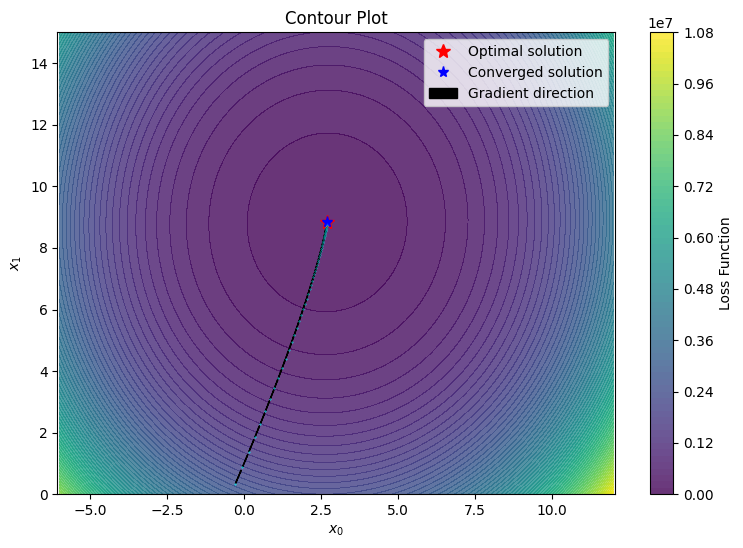

In [ ]:
n_grid = 200

import matplotlib.colors as mcolors

tmp_x0 = np.linspace(-6,12, num=n_grid)
tmp_x1 = np.linspace(0,15, num=n_grid)

x0, x1 = np.meshgrid(tmp_x0, tmp_x1)

_in = np.vstack([x0.reshape(-1), x1.reshape(-1)])

res = A@_in - b[:,None]
res = np.sum(res**2, axis=0)
res = res.reshape(n_grid,n_grid)

Z = res**2

plt.figure(figsize=(9,6), dpi=100)

plt.contourf(x0, x1, Z, levels=100, cmap='viridis', alpha=0.8)
sol_opt, = plt.plot(*x_opt,'*', color='red', markersize=10)
line_opt, = plt.plot(*x_jax,'*', color='blue', markersize=8)

for idx, (_x, g) in enumerate(zip(x_hist[::2], grads[::2])):
    line_p, = plt.plot(*_x, 'o', color='aqua', markersize=0.4 - 5e-3*idx)
    line_v = plt.arrow(*_x, *g*1.3e-3*(-1), head_width=2e-2, head_length=0.1,  color='black')

line_p = Line2D([0], [0], marker='o', color='aqua', markersize=8, linewidth=0)

plt.legend([sol_opt, line_opt, line_v], ['Optimal solution', 'Converged solution', 'Gradient direction'])

plt.colorbar(label='Loss Function')
plt.title('Contour Plot')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis('equal')
plt.show()

<br>

___

<br>

## More complicated function

We present below a test function widely used for evaluating the performance of optimization algorithms.

$$
{\displaystyle f({\boldsymbol {x}})=\sum _{i=1}^{n-1}\left[20\left(x_{i+1}-x_{i}^{2}\right)^{2}+\left(1-x_{i}\right)^{2}\right]}
$$

The global minimum for this function is inside a long, narrow, parabolic-shaped flat valley. To find the valley is trivial and the global minimum can be easily identified as $x^*_i=1$ for all $i$'s. However to converge to the global minimum via iterative algorithm is difficult.

We examine the case with $n=2$ below.

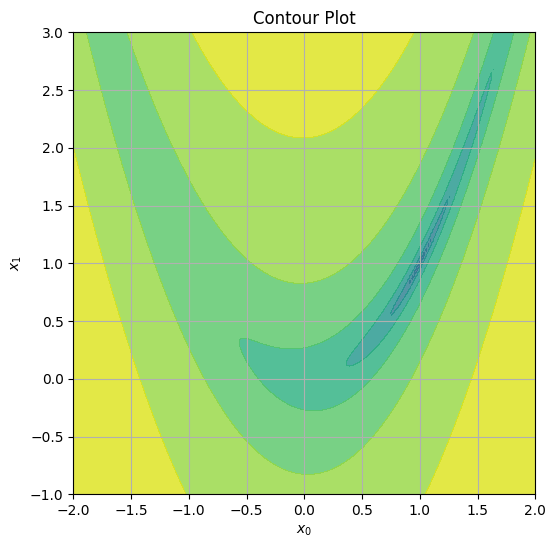

In [ ]:
def test_function(x):
    x0, x1 = x
    a0, a1 = 1, 20
    loss = (a0-x0)**2 + a1*(x1-x0**2)**2
    return loss

n_grid = 200

tmp_x0 = np.linspace(-2,2, num=n_grid)
tmp_x1 = np.linspace(-1,3, num=n_grid)

x0, x1 = np.meshgrid(tmp_x0, tmp_x1)

_in = np.vstack([x0.reshape(-1), x1.reshape(-1)])

res = test_function(_in)
res = res.reshape(n_grid,n_grid)

Z = res**2

plt.figure(dpi=100, figsize=(8,6))

plt.contourf(x0, x1, Z, levels=np.logspace(-7,7,10), alpha=0.8, \
             norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))

plt.title('Contour Plot')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis('square')
plt.grid()
plt.show()

Applying the naive gradient descent algorithm on this function gives the following.

In [ ]:
grad_test_function = jax.grad(test_function)
x_opt_tf = np.array([1, 1])

x = np.array([-0.5,2.5])

grads  = []
x_hist = []

for i in range(epochs):
    grad = grad_test_function(x)
    grads.append(grad)
    x_hist.append(x)
    if lg.norm(grad) <= eps_crt:
        break

    x_new = x - lr * grad

    x = x_new

x_sol_tf = x

diff = x_sol_tf - x_opt_tf

print(f"Optimal solution: {x_opt_tf}")
print(f"Optimal x via automatic differentiation and JAX: {x_sol_tf}")
print(f"Norm of the difference: {lg.norm(diff)}")

Optimal solution: [1 1]
Optimal x via automatic differentiation and JAX: [0.78544526 0.61204195]
Norm of the difference: 0.44333417200242475


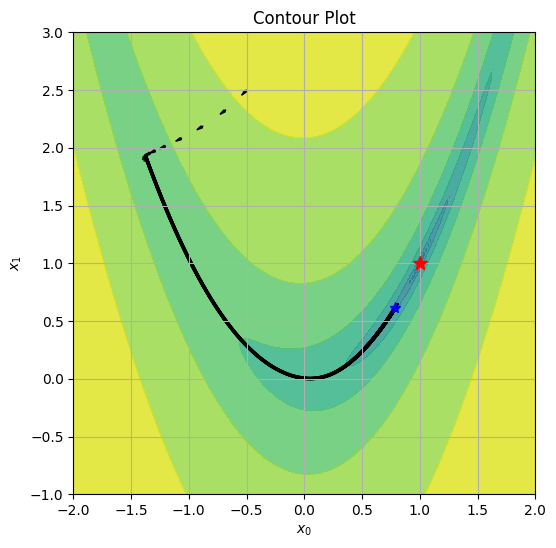

In [ ]:
n_grid = 200

tmp_x0 = np.linspace(-2,2, num=n_grid)
tmp_x1 = np.linspace(-1,3, num=n_grid)

x0, x1 = np.meshgrid(tmp_x0, tmp_x1)

_in = np.vstack([x0.reshape(-1), x1.reshape(-1)])

res = test_function(_in)
res = res.reshape(n_grid,n_grid)

Z = res**2

plt.figure(dpi=100, figsize=(8,6))

plt.contourf(x0, x1, Z, levels=np.logspace(-7,7,10), alpha=0.8, \
             norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()))
plt.plot(*x_opt_tf,'*', color='red', markersize=10)
plt.plot(*x_sol_tf,'*', color='blue', markersize=8)

for _x, g in zip(x_hist[::2], grads[::2]):
    plt.arrow(*_x, *g*1e-4*(-1), head_width=2e-2, head_length=0.05,  fc='blue')

plt.title('Contour Plot')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis('square')
plt.grid()
plt.show()

Discuss whether your naive gradient descent algorithm is efficient for this test function.

<br>

___

<br>

## Rastrigin Function

To further evaluate the performance of optimization algorithms, we introduce the **Rastrigin function**, a widely used non-convex test function in the field of global optimization. It is particularly known for its challenging landscape, which makes it an excellent benchmark for algorithms designed to escape local minima.

### Properties

The most notable property of the Rastrigin function is its **multimodality**, characterized by a large number of local minima. These local minima are regularly distributed across the search space, making it difficult for gradient-based optimization algorithms to converge to the global minimum, as they can easily get trapped in one of these local optima. The global minimum is typically located at $x_i = 0$ for all $i$, where the function value is zero.

### Mathematical Formulation

For an $n$-dimensional input vector $x = (x_1, x_2, \dots, x_n)$, the Rastrigin function is typically defined as:

$$
f(x) = 10n + \sum_{i=1}^{n} (x_i^2 - 10 \cos(2 \pi x_i))
$$

In this notebook, we will focus on the 2-dimensional case ($n=2$) to visualize its complex structure and observe how the gradient descent method performs.

We define the Rastrigin function using JAX, calculate its gradient, apply the gradient descent algorithm, and visualize the optimization path on a contour plot to demonstrate its behavior on a function with multiple local minima.



Starting Gradient Descent for Rastrigin Function with initial point: [1.7 1.4]
Converged at epoch 36
Global optimal solution: [0. 0.]
Optimal x via automatic differentiation and JAX for Rastrigin: [1.98991223 0.99495866]
Norm of the difference: 2.224790641804929


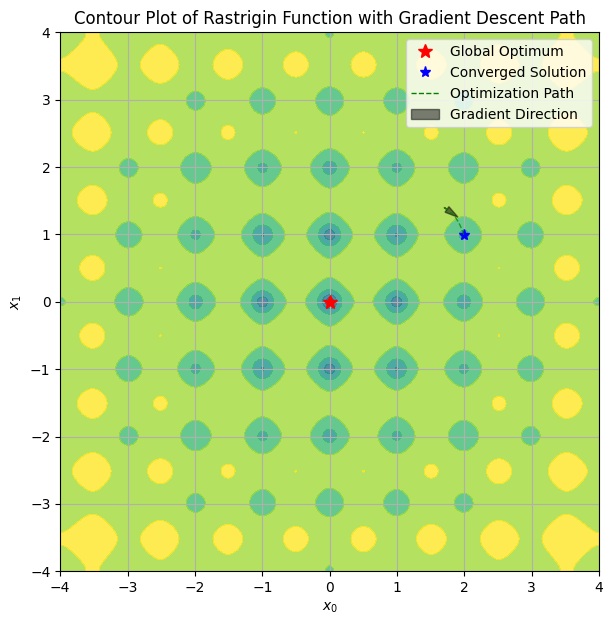

In [ ]:
def rastrigin_func(x):
    return 10 * 2 + jnp.sum(x**2 - 10 * jnp.cos(2 * jnp.pi * x))

grad_rastrigin_func = jax.grad(rastrigin_func)

x_init_rastrigin = jnp.array([1.7, 1.4])
x_opt_rastrigin = jnp.array([0.0, 0.0])

x = x_init_rastrigin

x_hist_rastrigin = []
grads_rastrigin = []

lr_rastrigin = 0.001
epochs_rastrigin = 10000

print(f"\nStarting Gradient Descent for Rastrigin Function with initial point: {x_init_rastrigin}")

for i in range(epochs_rastrigin):
    grad = grad_rastrigin_func(x)
    x_hist_rastrigin.append(x)
    grads_rastrigin.append(grad)

    if lg.norm(grad) <= eps_crt:
        print(f"Converged at epoch {i}")
        break

    x_new = x - lr_rastrigin * grad
    x = x_new

x_sol_rastrigin = x

diff_rastrigin = x_sol_rastrigin - x_opt_rastrigin

print(f"Global optimal solution: {x_opt_rastrigin}")
print(f"Optimal x via automatic differentiation and JAX for Rastrigin: {x_sol_rastrigin}")
print(f"Norm of the difference: {lg.norm(diff_rastrigin)}")

n_grid = 200
tmp_x0 = np.linspace(-4, 4, num=n_grid)
tmp_x1 = np.linspace(-4, 4, num=n_grid)

x0, x1 = np.meshgrid(tmp_x0, tmp_x1)

_in = np.vstack([x0.reshape(-1), x1.reshape(-1)])

res_rastrigin = jax.vmap(rastrigin_func)(_in.T) # Use vmap for vectorized computation with JAX
Z_rastrigin = res_rastrigin.reshape(n_grid, n_grid)

plt.figure(dpi=100, figsize=(9, 7))

plt.contourf(x0, x1, Z_rastrigin, levels=np.logspace(-1, 3, 10), alpha=0.8,
             norm=colors.LogNorm(vmin=Z_rastrigin.min(), vmax=Z_rastrigin.max()))

plt.plot(*x_opt_rastrigin, '*', color='red', markersize=10, label='Global Optimum')
plt.plot(*x_sol_rastrigin, '*', color='blue', markersize=8, label='Converged Solution')

step_size = 100
for _x, g in zip(x_hist_rastrigin[::step_size], grads_rastrigin[::step_size]):
    plt.arrow(*_x, *(g * (-1 * 0.05 / lg.norm(g))), head_width=0.1, head_length=0.2, fc='black', ec='black', alpha=0.5)

x_path_rastrigin = jnp.array(x_hist_rastrigin)
plt.plot(x_path_rastrigin[:, 0], x_path_rastrigin[:, 1], 'g--', linewidth=1, alpha=0.7, label='Optimization Path')

from matplotlib.patches import FancyArrow
legend_arrow = FancyArrow(0, 0, 0, 0, head_width=0.1, head_length=0.2, fc='black', ec='black', alpha=0.5, label='Gradient Direction')

plt.title('Contour Plot of Rastrigin Function with Gradient Descent Path')
plt.xlabel(r'$x_0$')
plt.ylabel(r'$x_1$')
plt.axis('square')
plt.grid(True)
plt.legend(handles=[plt.Line2D([0], [0], marker='*', color='red', markersize=10, linestyle='None', label='Global Optimum'),
                     plt.Line2D([0], [0], marker='*', color='blue', markersize=8, linestyle='None', label='Converged Solution'),
                     plt.Line2D([0], [0], color='g', linestyle='--', linewidth=1, label='Optimization Path'),
                     legend_arrow], loc='upper right')
plt.show()

<br>

---

<br>

## Analysis of Gradient Descent on the Rastrigin Function

As observed from the execution, the naive gradient descent algorithm, starting from `x_init_rastrigin = [1.7, 1.4]`, converged to `[1.98991223, 0.99495866]` instead of the known global optimum `[0.0, 0.0]`. The norm of the difference between the converged solution and the global optimum is approximately 2.22, indicating a significant deviation.

### Efficiency and Convergence:

1.  **Stuck in a Local Minimum**: The primary reason for not reaching the global minimum is the highly multimodal nature of the Rastrigin function. The contour plot clearly illustrates numerous local minima and maxima. Gradient descent, being a local optimization algorithm, follows the steepest descent direction from its starting point. If the initial point is within the basin of attraction of a local minimum that is not the global minimum, the algorithm will converge to that local minimum.

2.  **Learning Rate and Initial Point Sensitivity**: While the learning rate (`lr_rastrigin = 0.001`) and number of epochs (`epochs_rastrigin = 10000`) were set, even with these parameters, the algorithm quickly settled into a nearby local minimum. This highlights the sensitivity of gradient descent to the choice of initial conditions and learning rate on complex landscapes. A larger learning rate might overshoot minima, while a smaller one might lead to extremely slow convergence or also get trapped.

3.  **Inefficiency for Multimodal Functions**: For functions like Rastrigin, which are specifically designed to challenge optimization algorithms with their multitude of local minima, naive gradient descent is generally not efficient in finding the global optimum. It performs well in convex landscapes or when initialized very close to the global optimum, but struggles significantly in non-convex, multimodal scenarios.

4.  **Early Convergence**: The algorithm converged in only 27 epochs, significantly less than the specified 10,000 epochs. This rapid convergence to a local minimum further underscores its inability to explore the broader search space for the global optimum.

